<a href="https://www.kaggle.com/code/myrazd/health-costs-calculator-tf?scriptVersionId=192016796" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predicting Healthcare Costs with TensorFlow Linear Regression

* The following codes are written for the submission of the "[Linear Regression Health Costs Calculator](https://www.freecodecamp.org/learn/machine-learning-with-python/machine-learning-with-python-projects/linear-regression-health-costs-calculator)" challenge as part of the "[Machine Learning with Python Certification](https://www.freecodecamp.org/learn/machine-learning-with-python/#tensorflow)" by freeCodeCamp. The challenge is deemed successful if the model developed achieves an **MAE score of less than 3500**.

* Kindly be notified that this notebook only serves as my personal notes referring to the materials provided in the course. All credit is attributable to the instructors of the courses.

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2024-08-11 02:06:08.521709: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 02:06:08.521844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 02:06:08.667787: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load the insurance dataset

> We will use the Insurance dataset with the goal of predicting healthcare costs, given characteristics such as age, sex, bmi, etc.

In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2024-08-11 02:06:21--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: 'insurance.csv'

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.04s   

2024-08-11 02:06:22 (1.28 MB/s) - 'insurance.csv' saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


## Explore the dataset

> The dataset contains the following features.

In [3]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


> There are 1338 examples in the dataset.

In [4]:
dataset.shape[0]

1338

> The majority of patients are in their 20's and 30's.

<Axes: >

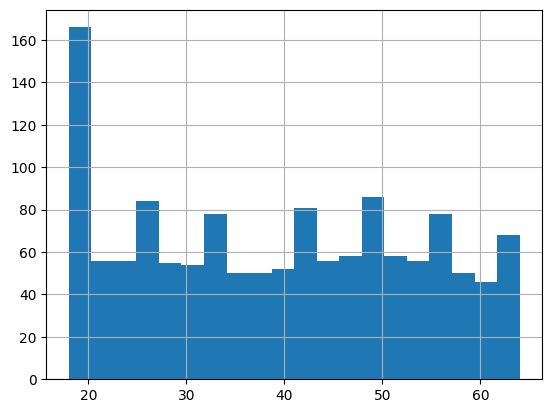

In [5]:
dataset.age.hist(bins=20)

> There are approximately the same amount of female patients and male patients.

<Axes: ylabel='sex'>

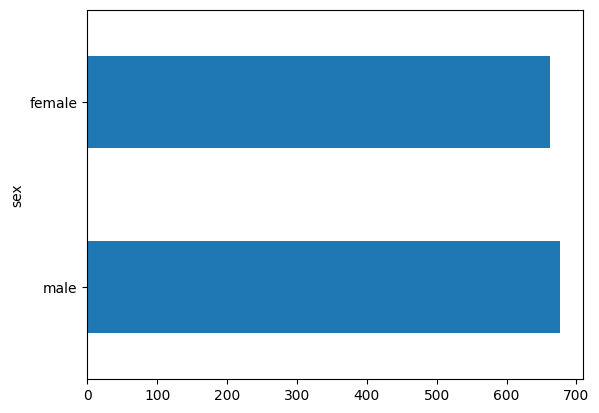

In [6]:
dataset.sex.value_counts().plot(kind='barh')

> The majority of patients were non-smokers.

<Axes: ylabel='smoker'>

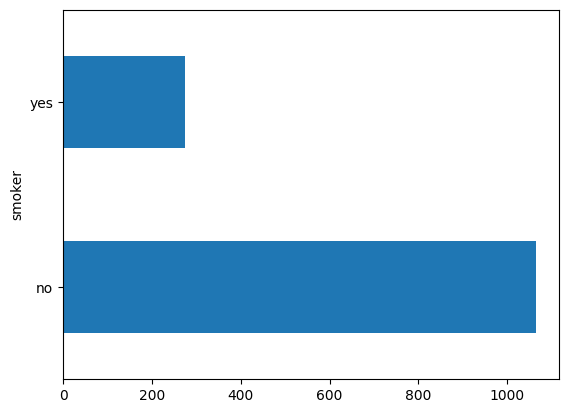

In [7]:
dataset['smoker'].value_counts().plot(kind='barh')

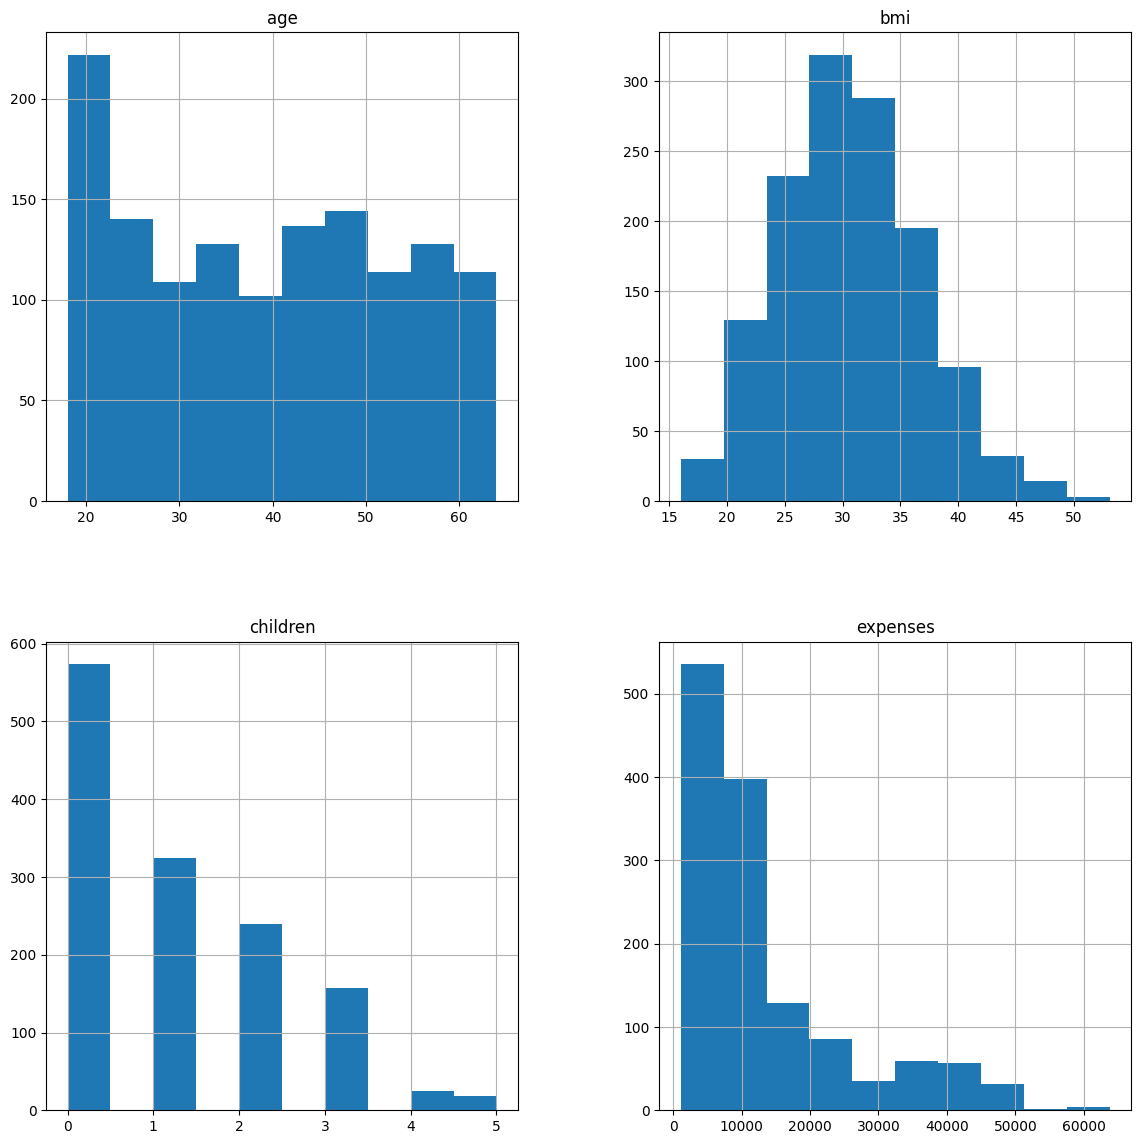

In [8]:
### plotting histograms for numerical attributes

dataset.hist(figsize=(14,14))
plt.show()

## Feature Engineering for the Model

In [9]:
# Convert categorical variables using one-hot encoding
categorical_columns = ['sex', 'smoker', 'region']
dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

In [10]:
# Separate features and target variable
X = dataset.drop('expenses', axis=1)
y = dataset['expenses']

> It is standard practice in the machine learning and data science areas to use random_state=42 in train_test_split. Other than being a popular arbitrary pick, number 42 has no particular significance. It makes sure that the data split does not change across code runs, which makes the outcomes repeatable. Essentially, it offers a means of managing unpredictability throughout the data-splitting procedure.

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assign the scaled test features to test_dataset and the test labels to test_labels
test_dataset = X_test_scaled
test_labels = y_test

In [13]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## Modelling

### Simple linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=X_train_scaled.shape[1:])
])

**Testing set Mean Abs Error: 12965.08 expenses**

### Adding more layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=X_train_scaled.shape[1:]),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

**Testing set Mean Abs Error: 3912.43 expenses**

### Dropout for regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=X_train_scaled.shape[1:]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1)
])

**Testing set Mean Abs Error: 3950.89 expenses**

### Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

model.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_split=0.2,  # Use a portion of data for validation
    callbacks=[early_stopping],
    verbose=0
)

**Testing set Mean Abs Error: 3714.61 expenses**

In [14]:
# Build the TensorFlow linear regression model with adjustments to the model architecture and hyperparameters
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=X_train_scaled.shape[1:]),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* **`tf.keras.Sequential()`**: This creates a linear stack of layers for your neural network model.
* **`tf.keras.layers.Dense(units=128, activation='relu', input_shape=X_train_scaled.shape[1:])`**: This adds a dense (fully connected) layer with 128 neurons. activation='relu' means it uses the ReLU function to introduce non-linearity, which helps the model learn complex patterns. input_shape=X_train_scaled.shape[1:] defines the shape of the input data (excluding the batch size).
* **`tf.keras.layers.Dropout(0.3)`**: This layer randomly ignores (or "drops out") 30% of the neurons during training to prevent overfitting, which helps the model generalize better.
* **`tf.keras.layers.Dense(units=64, activation='relu')`**: Another dense layer with 64 neurons and ReLU activation function.
* **`tf.keras.layers.Dense(units=1)`**: The final dense layer with a single neuron. This is where the model makes its prediction.

In [15]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error',
    metrics=['mae', 'mse']
)

* **`model.compile()`**: This prepares the model for training.
* **`optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)`**: The Adam optimizer is used to adjust the weights of the model during training. learning_rate=0.01 sets how big the steps are when updating weights.
* **`loss='mean_squared_error'`**: Defines the loss function, which measures how well the model's predictions match the actual values. Mean Squared Error (MSE) calculates the average of the squared differences between predicted and actual values.
* **`metrics=['mae', 'mse']`**: Specifies additional metrics to monitor during training. MAE stands for Mean Absolute Error, and MSE stands for Mean Squared Error.

In [16]:
# Train the model
model.fit(X_train_scaled, 
          y_train, 
          epochs=100, 
          verbose=0)

* **`model.fit(...)`**: This trains the model on the training data.
* **`X_train_scaled`**: The input features (scaled data) used to train the model.
* **`y_train`**: The target values (true values) that the model is trying to predict.
* **`epochs=100`**: The number of times the model will see the entire training dataset during training. Each pass through the data is called an epoch.
* **`verbose=0`**: Controls how much information is displayed during training. verbose=0 means no output will be shown; you can set it to 1 or 2 for more detailed logs.

9/9 - 0s - 18ms/step - loss: 20613072.0000 - mae: 2628.0510 - mse: 20613072.0000
Testing set Mean Abs Error: 2628.05 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


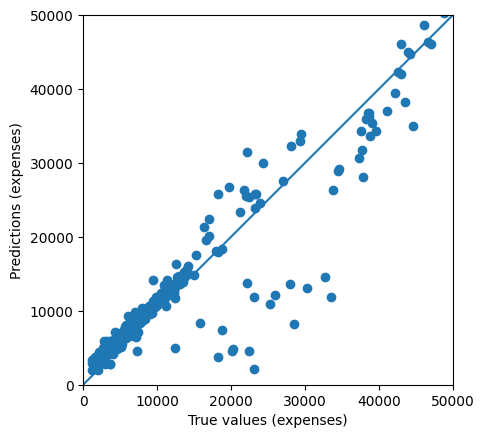

In [17]:
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
    print("You passed the challenge. Great job!")
else:
    print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)